In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [156]:
url1 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
url2 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'
data = pd.read_csv(url1)
weather = pd.read_csv(url2)

In [9]:
data.head(10)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


1.Посмотрим, какие компании больше всех задерживаются в среднем -- с ними надо как можно меньше контрактов заключать

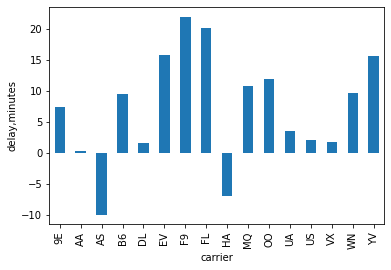

In [25]:
x1 = data.groupby('carrier')['arr_delay'].mean()
x1.plot.bar()
plt.ylabel('delay,minutes')
plt.show()

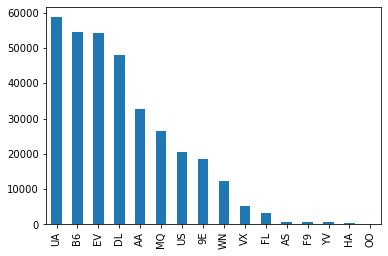

In [34]:
data['carrier'].value_counts().plot.bar()
plt.show()

Как видно, компании F9,FL,YV,EV задерживаются в полётах сильнее остальных. Но если для первых трёх это ещё н етак критично (ведь у них очень мало рейсов), то работа EV серьезно проседает (большая компания и большие задержки), то есть, она сильно загружает работу аэропортов в целом -- и к ней нужно на этот счет обратиться.

2.Посмотрим, в каком аэропорте вылета больше всего задержки

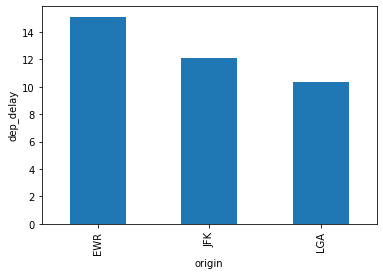

In [186]:
x2 = data.groupby('origin')['dep_delay'].mean()
x2.plot.bar()
plt.ylabel('dep_delay')
plt.show()

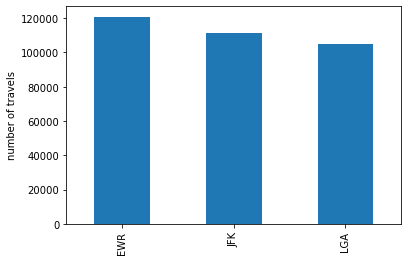

In [187]:
x3 = data['origin']
x3.value_counts().plot.bar()
plt.ylabel('number of travels')
plt.show()

Выходит, что неравномерная загрузка аэропортов приводит к большим задержкам в более загруженных аэропортах (EWR > JFK > LGA). Логично, что более равномерное распределение рейсов приведёт к уменьшению времени задержек в EWR (хотя и, быть может, увеличению задержек в LGA)

3.Посмотрим на среднее время задержки по дням

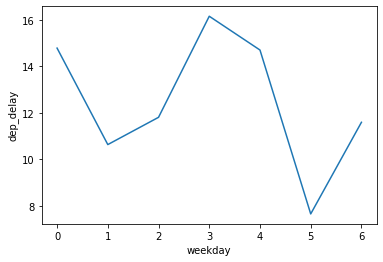

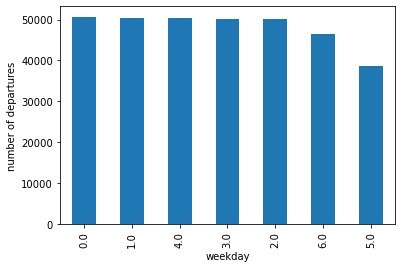

In [75]:
x4 = np.arange(12)
x4 = data.groupby('month')['day'].max()
X = np.zeros(12)
for i in range(11):
    X[i+1]=X[i]+x4[i+1]
data['week'] = (data['day']+X[data['month']-1])%7
data.groupby('weekday')['dep_delay'].mean().plot()
plt.ylabel('dep_delay')
plt.show()
data['weekday'].value_counts().plot.bar()
plt.ylabel('number of departures')
plt.xlabel('weekday')
plt.show()

Помня, что первый (те на графике -- нулевой) день недели в 2013 году был вторник, получим, что в пятницу и субботу задержки самые большие, те на эти дни стоит обратить внимание, и например, привлечь для работы больше сотрудников аэропорта

4.Посмотрим на загрузку и среднюю задержку по месяцам

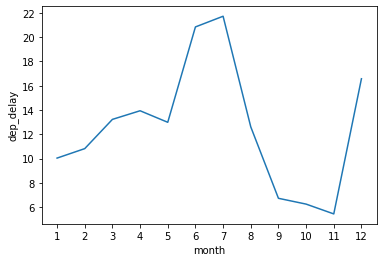

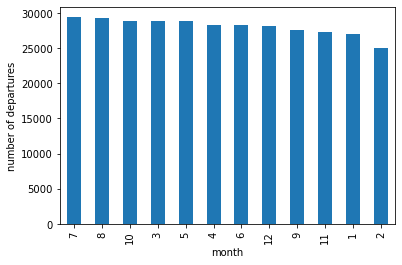

In [85]:
data.groupby('month')['dep_delay'].mean().plot()
plt.xticks(np.arange(12)+1)
plt.ylabel('dep_delay')
plt.show()
data['month'].value_counts().plot.bar()
plt.ylabel('number of departures')
plt.xlabel('month')
plt.show()

Выходит, что при примерно одинаковой загрузке во все месяцы, задержка именно в июне и июле сильно превышает остальные месяцы, то есть на летний период (отпуска..) работать аэропортам надо усерднее, стимулировать работать  сотрудников

5. Есть ли взаимосвязь с временем вылета?

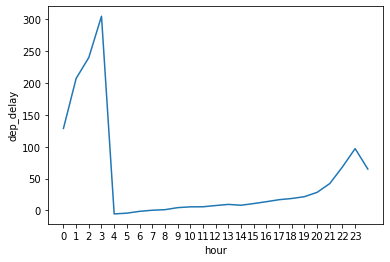

In [91]:
data.groupby('hour')['dep_delay'].mean().plot()
plt.ylabel('dep_delay')
plt.xticks(np.arange(24))
plt.show()

Видно, что зависимость сильная -- стоит уделить больше внимания обеспечению ночных вылетов

6.Есть ли зависимость между временем полёта и временем задержки вылета и прилёта?

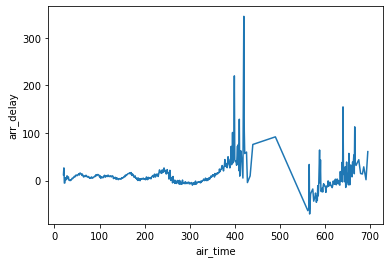

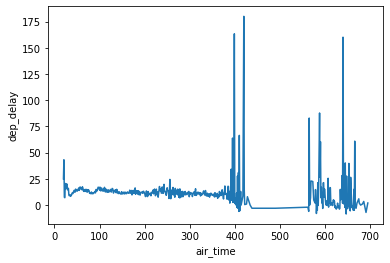

In [105]:
data.groupby('air_time')['arr_delay'].mean().plot()
plt.ylabel('arr_delay')
plt.show()
data.groupby('air_time')['dep_delay'].mean().plot()
plt.ylabel('dep_delay')
plt.show()

Как видно, рейсы с временем полёта 400 минут имеют наибольшую задержку, а потому нужно обратить большее внимание на них при вылете и прилёте.

7. Есть ли зависимость видимости и времени задержек?

In [160]:
#weather('days') = weather('day')+X[(int)weather['month']-1]
#weather['days'] = weather['day']+X[weather['month']-1]
x4 = np.arange(12)
x4 = data.groupby('month')['day'].max()
X = np.zeros(12)
for i in range(11):
    X[i+1]=X[i]+x4[i+1]
weather['month'] = pd.to_numeric(weather['month'], errors='coerce')
weather = weather.dropna(subset=['month'])
weather['month'] = weather['month'].astype(int)
weather['days'] = weather['day']+X[weather['month']-1]

In [183]:
weather.head(1000)

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,days
0,1,EWR,2013,1,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.00,1013.9,10.0,1.0
1,2,EWR,2013,1,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.00,1013.0,10.0,1.0
2,3,EWR,2013,1,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.00,1012.6,10.0,1.0
3,4,EWR,2013,1,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.00,1012.7,10.0,1.0
4,5,EWR,2013,1,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.00,1012.8,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,EWR,2013,2,11.0,12.0,37.40,37.40,100.00,0.0,0.00000,0.000000,0.06,NaN,3.0,42.0
996,997,EWR,2013,2,11.0,13.0,37.40,35.60,93.14,40.0,4.60312,5.297178,0.05,NaN,2.0,42.0
997,998,EWR,2013,2,11.0,14.0,35.60,35.60,100.00,20.0,5.75390,6.621473,0.06,NaN,1.0,42.0
998,999,EWR,2013,2,11.0,15.0,35.96,35.96,100.00,30.0,5.75390,6.621473,0.02,1014.5,0.5,42.0


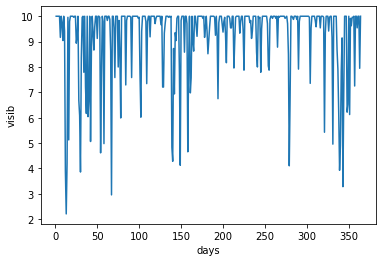

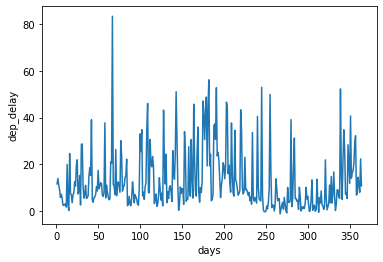

In [173]:
weather.groupby('days')['visib'].mean().plot()
plt.ylabel('visib')
plt.show()
data['days'] = data['day']+X[data['month']-1]
data.groupby('days')['dep_delay'].mean().head(364).plot()
plt.ylabel('dep_delay')
plt.show()

In [175]:
print(np.corrcoef(data.groupby('days')['dep_delay'].mean().head(364),weather.groupby('days')['visib'].mean())[0][1])

-0.4089494461051722


ТО есть видимость очень сильно влияет на задержки (корреляция 40%). Чтобы улучшить ситуацию, можно улучшить навигационные приборы, поставить дополнительные вышки для коммуникации и локаторы...

8. Есть ли взаимосвязь задержек и влажности (точки росы)?

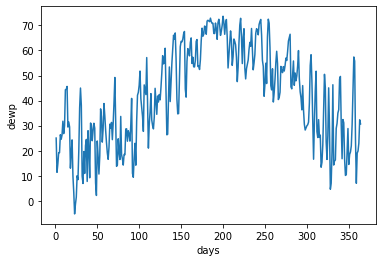

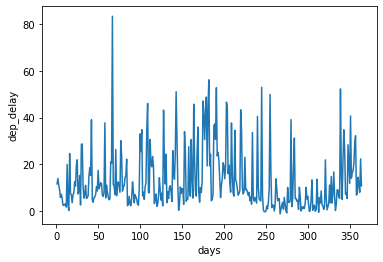

In [176]:
weather.groupby('days')['dewp'].mean().plot()
plt.ylabel('dewp')
plt.show()
data.groupby('days')['dep_delay'].mean().head(364).plot()
plt.ylabel('dep_delay')
plt.show()

In [177]:
print(np.corrcoef(data.groupby('days')['dep_delay'].mean().head(364),weather.groupby('days')['dewp'].mean())[0][1])

0.3180840978315009


Здесь корреляция 30%, что довольно немало. Для улучшения ситуации можно предложить улучшить защиту корпусов самолетов от, например, обледенения (с помощью обработкой специальными средствами типа антифриз), закупив более быстродействующие приборы

9. Есть ли зависимость задержек от температуры?

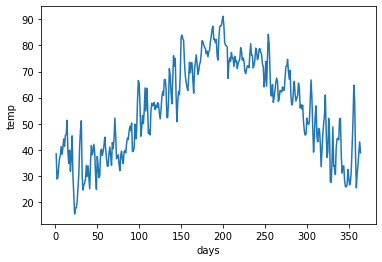

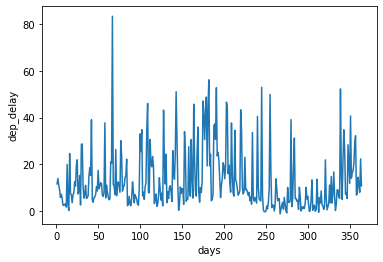

In [185]:
weather.groupby('days')['temp'].mean().plot()
plt.ylabel('temp')
plt.show()
data.groupby('days')['dep_delay'].mean().head(364).plot()
plt.ylabel('dep_delay')
plt.show()

In [180]:
print(np.corrcoef(data.groupby('days')['dep_delay'].mean().head(364),weather.groupby('days')['temp'].mean())[0][1])

0.1912645642884006


Корреляция 20%, что тоже немало, стоит так же обрабатывать корпуса самолетов защитными средствами и чаще проводить инспекции состояния самолетов (корпус, двигатели и тд сильнее изнашиваются и могут потребовать замены в неподходящий момент)

10. Есть ли взаимосвязь давления и задержек?

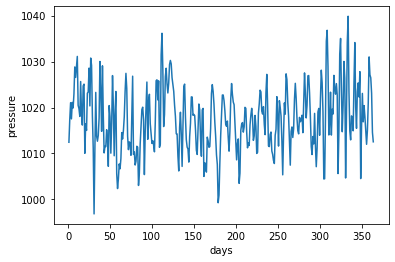

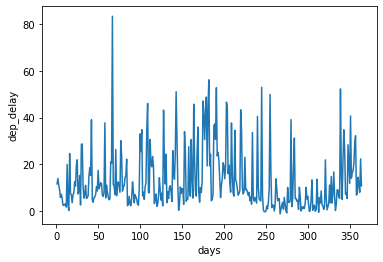

In [184]:
weather.groupby('days')['pressure'].mean().plot()
plt.ylabel('pressure')
plt.show()
data.groupby('days')['dep_delay'].mean().head(364).plot()
plt.ylabel('dep_delay')
plt.show()

In [182]:
print(np.corrcoef(data.groupby('days')['dep_delay'].mean().head(364),weather.groupby('days')['pressure'].mean())[0][1])

-0.2678965457140785


Корреляция примерно 27%, а значит давление тоже влияет на появление и увеличение задержек. К ней, в целом, применимы те же меры, что и в предыдущем пункте.